### Выборочная средняя для 36 выборок


$$n = \frac{t^2𝜎^2}{𝛿^2}$$

<h3>Среднеквадратическое отклонение</h3>

In [1]:
from collections import Counter
import math
f = open("moscow_2021.txt", "r")
data = []
for num in f:
    num = num.strip()
    if num:
        data.append(int(num))

def average(data):
    average_sum = 0
    for num in data:
        average_sum += num
    average_num = average_sum/len(data)
    return average_num


def variance(data):
    variance_sum = 0
    average_of_data = average(data)
    num_count = Counter(data)
    for num in data:
        
        variance_sum += ((num - average_of_data)**2)
    return ((variance_sum)/len(data))


#2Φ(𝑡) = 0,95 ⇒ Φ(𝑡) = 0,475
#Значению 0,475 в таблице функции Лапласа соответствует значение
#аргумента 𝑡 = 1,96
n = round((1.96 * 1.96 * variance(data))/(3*3))
average_values = []
samples = []
for i in range(0,36):
    temp_data = []
    for j in range(0,n):
        temp_data.append(data[i+j+150])
    average_values.append(average(temp_data))
    samples.append(temp_data)
    temp_data = []

print(average_values)
for sample in samples:
    print(sample)


print(n)


[31.306451612903224, 31.661290322580644, 31.887096774193548, 31.693548387096776, 32.0, 31.870967741935484, 32.11290322580645, 31.919354838709676, 32.016129032258064, 32.16129032258065, 31.806451612903224, 31.43548387096774, 31.64516129032258, 31.483870967741936, 31.919354838709676, 31.806451612903224, 31.403225806451612, 31.274193548387096, 31.129032258064516, 30.919354838709676, 30.806451612903224, 30.85483870967742, 31.241935483870968, 31.29032258064516, 30.919354838709676, 30.85483870967742, 30.612903225806452, 30.322580645161292, 30.370967741935484, 30.338709677419356, 30.338709677419356, 30.29032258064516, 30.580645161290324, 30.370967741935484, 30.43548387096774, 30.919354838709676]
[34, 24, 42, 19, 37, 21, 31, 34, 32, 47, 49, 23, 35, 24, 29, 48, 29, 36, 34, 39, 39, 25, 23, 52, 31, 33, 48, 35, 24, 25, 28, 30, 34, 34, 19, 29, 39, 33, 38, 25, 47, 19, 31, 19, 22, 27, 27, 24, 38, 31, 33, 27, 22, 25, 32, 28, 24, 48, 37, 18, 28, 23]
[24, 42, 19, 37, 21, 31, 34, 32, 47, 49, 23, 35, 24, 

In [2]:
def interval_distribution(average_values):
    min_value = math.floor(min(average_values))
    max_value = math.ceil(max(average_values))

    intervals = {}
    for i in range(min_value, max_value):
        intervals[f"{i}-{i+1}"] = 0

    for value in average_values:
        rounded_value = int(value)
        intervals[f"{rounded_value}-{rounded_value+1}"] += 1

    return intervals


intervals = interval_distribution(average_values)

def relative_freq(intervals, average_values):
    rel_inntervals = {}
    for key, value in intervals.items():
        rel_value = value / len(average_values)
        rel_inntervals[key] = f"{rel_value}"
    return rel_inntervals
rel_freq = relative_freq(intervals, average_values)
for key, value in rel_freq.items():
    print(f"{key}: {value}")


30-31: 0.4166666666666667
31-32: 0.4722222222222222
32-33: 0.1111111111111111


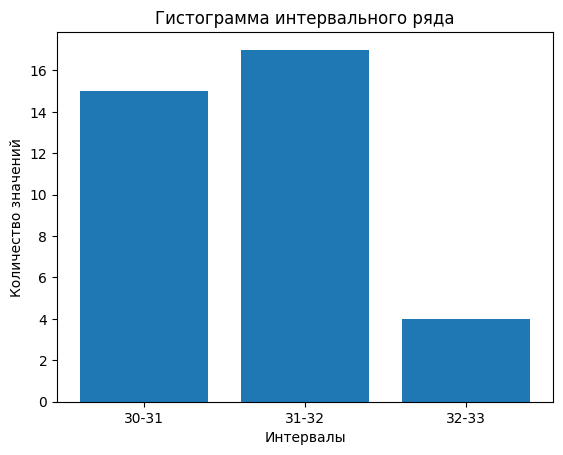

In [3]:
# ключи и значения из словаря
import matplotlib.pyplot as plt
keys = list(intervals.keys())
values = list(intervals.values())

# построение гистограммы
plt.bar(keys, values)
plt.xlabel('Интервалы')
plt.ylabel('Количество значений')
plt.title('Гистограмма интервального ряда')
plt.show()

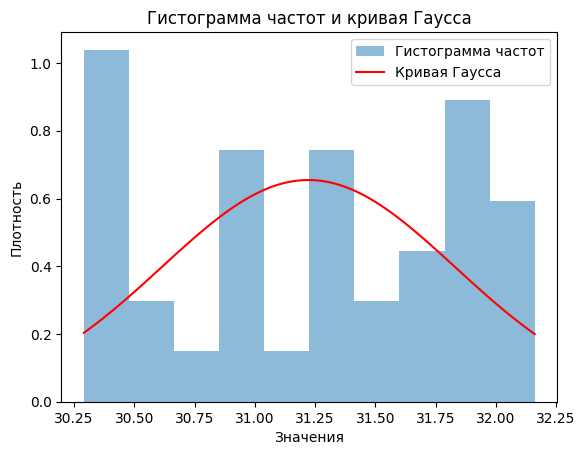

In [4]:
import numpy as np

data = np.array(average_values)
n = len(data)
x_avg = np.mean(data)
s2 = np.var(data, ddof=1)

# оценки параметров нормального распределения
mu = x_avg
sigma2 = s2

# построение кривой Гаусса
x = np.linspace(min(data), max(data), 100)
y = np.exp(-((x-mu)**2)/(2*sigma2)) / np.sqrt(2*np.pi*sigma2)

# построение гистограммы
plt.hist(data, bins=10, density=True, alpha=0.5, label='Гистограмма частот')

plt.plot(x, y, 'r-', label='Кривая Гаусса')

plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.title('Гистограмма частот и кривая Гаусса')
plt.legend()
plt.show()

На основании одной из сгенерированных выборок найти
доверительный интервал для оценки математического ожидания случайной
величины «возраст» с надежностью 0,95, предполагая, что среднее
квадратическое отклонение неизвестно.


1. Находим значение критерия Стюдента по таблице
    1. Получим $t_{62;0,95} = 1,671$
    2. Проводим расчет исправленного среднего квадратического отклонения

In [6]:
import math
import random

n_sample = random.randint(0, 36)
rand_sample = samples[n_sample-1]
print(rand_sample)
t_student = 1.671
x_v = average(rand_sample)
print(x_v)
sum_for_sample = 0
for i in range(0,len(rand_sample)):
    sum_for_sample += (rand_sample[i] - x_v) ** 2
s = math.sqrt(sum_for_sample/len(rand_sample)-1)

deviation = t_student*s/math.sqrt(len(rand_sample))
print(deviation)

print(f"{x_v - deviation} < a < {x_v + deviation} ")

[47, 49, 23, 35, 24, 29, 48, 29, 36, 34, 39, 39, 25, 23, 52, 31, 33, 48, 35, 24, 25, 28, 30, 34, 34, 19, 29, 39, 33, 38, 25, 47, 19, 31, 19, 22, 27, 27, 24, 38, 31, 33, 27, 22, 25, 32, 28, 24, 48, 37, 18, 28, 23, 56, 38, 30, 38, 29, 36, 19, 40, 41]
32.16129032258065
1.8832191640223035
30.278071158558344 < a < 34.04450948660295 
